In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras.optimizers import RMSprop
from plot_util import plot_history

Using TensorFlow backend.


In [2]:
MAX_FEATURES = 10000
MAXLEN = 500

In [3]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=MAX_FEATURES)
print("len(train_x) = {}".format(len(train_x)))
print("len(test_x) = {}".format(len(test_x)))

train_x = pad_sequences(train_x, MAXLEN)
test_x = pad_sequences(test_x, MAXLEN)
print("train_x.shape = {}".format(train_x.shape))
print("test_x.shape = {}".format(test_x.shape))

len(train_x) = 25000
len(test_x) = 25000
train_x.shape = (25000, 500)
test_x.shape = (25000, 500)


In [4]:
model = Sequential()
model.add(Embedding(MAX_FEATURES, 128, input_length=MAXLEN))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(
    train_x, train_y, epochs=10, batch_size=128, 
    validation_split=0.2, 
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 4s - loss: 0.8337 - acc: 0.5090 - val_loss: 0.6875 - val_acc: 0.5638
Epoch 2/10
 - 2s - loss: 0.6700 - acc: 0.6395 - val_loss: 0.6642 - val_acc: 0.6568
Epoch 3/10
 - 2s - loss: 0.6234 - acc: 0.7552 - val_loss: 0.6071 - val_acc: 0.7440
Epoch 4/10
 - 2s - loss: 0.5250 - acc: 0.8097 - val_loss: 0.4844 - val_acc: 0.8072
Epoch 5/10
 - 2s - loss: 0.4086 - acc: 0.8479 - val_loss: 0.4276 - val_acc: 0.8308
Epoch 6/10
 - 2s - loss: 0.3503 - acc: 0.8669 - val_loss: 0.4226 - val_acc: 0.8380
Epoch 7/10
 - 2s - loss: 0.3109 - acc: 0.8651 - val_loss: 0.4430 - val_acc: 0.8192
Epoch 8/10
 - 2s - loss: 0.2786 - acc: 0.8554 - val_loss: 0.4234 - val_acc: 0.8102
Epoch 9/10
 - 2s - loss: 0.2541 - acc: 0.8395 - val_loss: 0.4412 - val_acc: 0.7912
Epoch 10/10
 - 2s - loss: 0.2312 - acc: 0.8144 - val_loss: 0.4934 - val_acc: 0

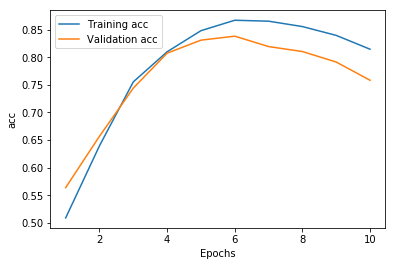

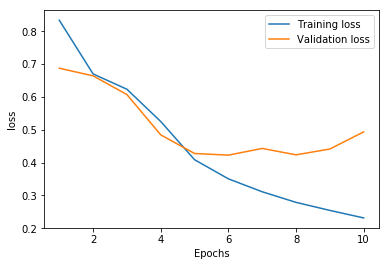

In [7]:
plot_history(history, metrics=['acc', 'loss'])